# KMP Algorithm: Graphical Analysis

This notebook provides a graphical performance analysis of the KMP (Knuth–Morris–Pratt) exact pattern matching algorithm for DNA sequences.

Notation:
- n = length of the text (len(text))
- m = length of the pattern (len(pattern))

Reference and attribution:
- KMP algorithm and LPS (computeLPSArray) flow adapted from GeeksforGeeks (ported from C++):
  https://www.geeksforgeeks.org/kmp-algorithm-for-pattern-searching/

In [25]:
# Setup: imports and environment
import os, sys, time, json

# Ensure this notebook can import from the KMP package directory
sys.path.append(os.path.abspath("."))  # current folder (should be STARK/KMP)

try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys as _sys
    !{_sys.executable} -m pip install -q matplotlib
    import matplotlib.pyplot as plt

from kmp import KMP, search_multiple_patterns, find_approximate_matches
from utils import generate_random_dna

plt.rcParams["figure.figsize"] = (8, 4.8)
plt.rcParams["axes.grid"] = True

def time_call(func, *args, **kwargs):
    start = time.perf_counter()
    result = func(*args, **kwargs)
    end = time.perf_counter()
    return result, (end - start)

## Experiment 1: Impact of Pattern Length (fixed text length)

We fix the text length (n) and vary pattern length (m).

Method:
- Generate a random DNA text of length n
- For each m in a range, take a substring from the text as pattern (to ensure matches exist)
- Run KMP.search and record time
- Plot m vs. time (ms)

In [28]:
import statistics as stats

def benchmark_pattern_length(n=1_000_000, pattern_lengths=(5, 10, 20, 50, 100, 200, 400, 800), trials=50, seed_text=42):
    text = generate_random_dna(n, seed=seed_text)
    results = []
    for m in pattern_lengths:
        # Use a slice from text to ensure at least one match
        pattern = text[1000:1000+m]
        kmp = KMP(pattern)
        times = []
        for _ in range(trials):
            _, t = time_call(kmp.search, text)
            times.append(t)
        results.append({
            "pattern_length": m,
            "n": n,
            "time_seconds_mean": stats.mean(times),
            "time_seconds_min": min(times),
            "time_seconds_max": max(times),
            "matches_found": len(kmp.search(text)),
        })
    return results

pattern_len_results = benchmark_pattern_length()
pattern_len_results

[{'pattern_length': 5,
  'n': 1000000,
  'time_seconds_mean': 0.1057496589999937,
  'time_seconds_min': 0.10360006999962934,
  'time_seconds_max': 0.11064230399915687,
  'matches_found': 983},
 {'pattern_length': 10,
  'n': 1000000,
  'time_seconds_mean': 0.10716566313994917,
  'time_seconds_min': 0.10423208599968348,
  'time_seconds_max': 0.1298727109997344,
  'matches_found': 2},
 {'pattern_length': 20,
  'n': 1000000,
  'time_seconds_mean': 0.10631226183999389,
  'time_seconds_min': 0.10377599499952339,
  'time_seconds_max': 0.11701279299995804,
  'matches_found': 1},
 {'pattern_length': 50,
  'n': 1000000,
  'time_seconds_mean': 0.10693424127999605,
  'time_seconds_min': 0.10408436299985624,
  'time_seconds_max': 0.11983724200035795,
  'matches_found': 1},
 {'pattern_length': 100,
  'n': 1000000,
  'time_seconds_mean': 0.10690039579996664,
  'time_seconds_min': 0.10318942600042647,
  'time_seconds_max': 0.13369857299949217,
  'matches_found': 1},
 {'pattern_length': 200,
  'n': 100

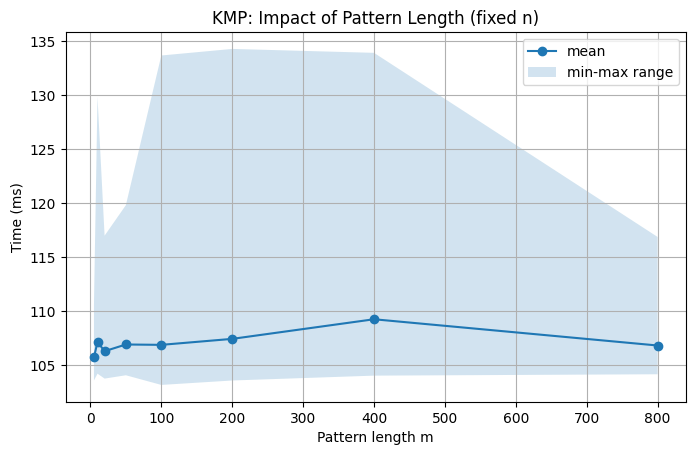

In [29]:
# Plot: m vs time (ms)
ms = [r["time_seconds_mean"] * 1000 for r in pattern_len_results]
ms_min = [r["time_seconds_min"] * 1000 for r in pattern_len_results]
ms_max = [r["time_seconds_max"] * 1000 for r in pattern_len_results]
m_values = [r["pattern_length"] for r in pattern_len_results]

plt.figure()
plt.plot(m_values, ms, marker='o', label='mean')
plt.fill_between(m_values, ms_min, ms_max, alpha=0.2, label='min-max range')
plt.xlabel('Pattern length m')
plt.ylabel('Time (ms)')
plt.title('KMP: Impact of Pattern Length (fixed n)')
plt.legend()
plt.show()

## Experiment 2: Impact of Text Length (fixed pattern length)

We fix the pattern length (m) and vary the text length (n).

Method:
- For each n in a range, generate random DNA text
- Keep a fixed m and select a known-in-text pattern
- Run KMP.search and record time
- Plot n vs. time (ms) and n vs. speed (million chars/sec)

In [23]:
def benchmark_text_length(text_lengths=(100_000, 500_000, 1_000_000, 2_000_000), m=50, trials=10, seed_pat=42):
    pattern_seed_text = generate_random_dna(1000 + m + 100, seed=seed_pat)
    pattern = pattern_seed_text[100:100+m]  # ensure fixed m across runs
    results = []
    for n in text_lengths:
        text = generate_random_dna(n, seed=100)
        kmp = KMP(pattern)
        times = []
        for _ in range(trials):
            _, t = time_call(kmp.search, text)
            times.append(t)
        t_mean = stats.mean(times)
        cps = (n / t_mean) if t_mean > 0 else float('inf')
        results.append({
            "n": n,
            "pattern_length": m,
            "time_seconds_mean": t_mean,
            "time_seconds_min": min(times),
            "time_seconds_max": max(times),
            "chars_per_second": cps,
            "Mchars_per_second": cps / 1e6
        })
    return results

text_len_results = benchmark_text_length()
text_len_results

[{'n': 100000,
  'pattern_length': 50,
  'time_seconds_mean': 0.011286515600204439,
  'time_seconds_min': 0.010857876000045508,
  'time_seconds_max': 0.01216277599996829,
  'chars_per_second': 8860130.401821148,
  'Mchars_per_second': 8.860130401821147},
 {'n': 500000,
  'pattern_length': 50,
  'time_seconds_mean': 0.05329038550007681,
  'time_seconds_min': 0.05272379100006219,
  'time_seconds_max': 0.05438650999985839,
  'chars_per_second': 9382555.50805275,
  'Mchars_per_second': 9.38255550805275},
 {'n': 1000000,
  'pattern_length': 50,
  'time_seconds_mean': 0.1095068714998888,
  'time_seconds_min': 0.10731458600002952,
  'time_seconds_max': 0.11494341199977498,
  'chars_per_second': 9131847.036658475,
  'Mchars_per_second': 9.131847036658476},
 {'n': 2000000,
  'pattern_length': 50,
  'time_seconds_mean': 0.2157810794999932,
  'time_seconds_min': 0.21114843799932714,
  'time_seconds_max': 0.23031544000059512,
  'chars_per_second': 9268653.232407538,
  'Mchars_per_second': 9.268653

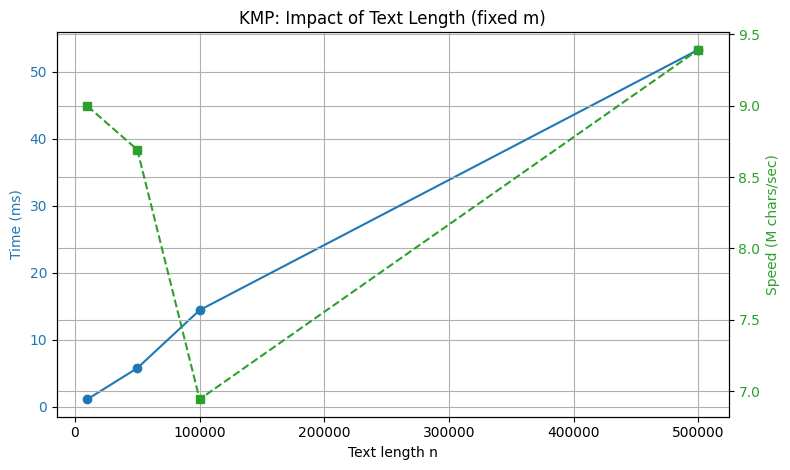

In [14]:
# Plot: n vs time (ms) and speed (M chars/sec)
n_values = [r["n"] for r in text_len_results]
time_ms = [r["time_seconds_mean"] * 1000 for r in text_len_results]
speed_mcs = [r["Mchars_per_second"] for r in text_len_results]

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Text length n')
ax1.set_ylabel('Time (ms)', color=color)
ax1.plot(n_values, time_ms, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Speed (M chars/sec)', color=color)
ax2.plot(n_values, speed_mcs, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('KMP: Impact of Text Length (fixed m)')
fig.tight_layout()
plt.show()

## Experiment 3: Multiple Pattern Search

We evaluate total time to search for multiple patterns against the same text.

Method:
- Generate a fixed text of length n
- Create k patterns with varying m (by slicing from text)
- Use `search_multiple_patterns` and measure total time
- Summarize counts and total time

In [24]:
def benchmark_multiple_patterns(n=1_000_000, k=25, base_m=10):
    text = generate_random_dna(n, seed=42)
    patterns = []
    for i in range(k):
        m = base_m + 5 * i
        patterns.append(text[i*100 : i*100 + m])  # ensure matches
    matches_dict, t = time_call(search_multiple_patterns, text, patterns)
    total_matches = sum(len(v) for v in matches_dict.values())
    return {
        "n": n,
        "k": k,
        "total_time_ms": t * 1000,
        "total_matches": total_matches,
        "details": {p: len(matches_dict[p]) for p in patterns}
    }

mp_results = benchmark_multiple_patterns()
mp_results

{'n': 1000000,
 'k': 25,
 'total_time_ms': 2657.5152899995373,
 'total_matches': 26,
 'details': {'AAGCCCAATA': 2,
  'TTGAAGGAGTCTAGC': 1,
  'AAACCTTTCTACTATGTGTT': 1,
  'ACAGCTCAGGAGCCAGTCCCCTACG': 1,
  'AGGACGCCCAACTATTCTTTCCAATCCTAC': 1,
  'AGTGCTGGTGTGATAAGCAAACCACCCTACTGGCA': 1,
  'AGCTCGGTGTGGTGGGCACGACCCTGGACGCGCGACGAAG': 1,
  'CCGCAACGGTATGTGTTAATGGAACAGACTTGCTTATGTGGACGT': 1,
  'GAGGTCTTGGTTGCCTCTAGTTTCTACGATATACTCATGGTAGTGTAACG': 1,
  'GGGATGAATGCGCCGCAAGTAGCAGGTCCCGGCGTGGATACCTGATAGATGGTGA': 1,
  'ACAAGCCCACCCGCAGCCGCAACAGCGACGACTAATTGATCAGTAATTTATTAAGCACGG': 1,
  'GACCTCAGGAGCTAGACGGGGACCTACAACTTTGCGGGAACCAAGTTTTTGCAGTAGTGACTAAC': 1,
  'TACTTATGGCGCAACGGCCACGCCCACTTTGGCTATTGGAGAGTTAAGGAATTATCGTCATAGACACTTC': 1,
  'AGGCCGTCCCCAGAAGCTCCCCTATGCTGTCCGTCGTTGTTCCCGATGAAGACGTCTACTGATATGCTAGCAGAG': 1,
  'ATACCGTAGCTCAGAATTATGGAGAGCAGCAGGCTTCCATAGCACAGGTTGACGGAGGAGTTTTGCTTGGATATCGGAAG': 1,
  'ACACGGTACTGGTACGTGGCAACTTAGGTCGTCACATCTAGGAGGCCGCACCCTAGGTCAAGTTTTACGATTGCCCTAACGCCGC': 1,


## Save Results (optional)

You can save the experiment outputs to JSON for later comparison.

In [ ]:
out = {
    "pattern_length": pattern_len_results,
    "text_length": text_len_results,
    "multiple_patterns": mp_results,
    "approximate": approx_results,
}
with open("kmp_nb_results.json", "w") as f:
    json.dump(out, f, indent=2)
print("Saved kmp_nb_results.json")

In [19]:
# Diagnostics: check matches and periodicity (via LPS) per m
import math

# Recreate the same text and pattern selection as in benchmark_pattern_length
n = 100_000
seed_text = 42
text = generate_random_dna(n, seed=seed_text)
pattern_lengths = (5, 10, 20, 50, 100, 200)

rows = []
for m in pattern_lengths:
    pattern = text[1000:1000+m]
    kmp_tmp = KMP(pattern)
    lps_end = kmp_tmp.lps[-1] if m > 0 else 0
    # A pattern is periodic if m % (m - lps_end) == 0 and lps_end > 0
    period = (m - lps_end) if (lps_end > 0 and (m - lps_end) > 0 and (m % (m - lps_end) == 0)) else None
    matches = len(kmp_tmp.search(text))
    rows.append({
        'm': m,
        'lps_last': lps_end,
        'period': period,
        'matches_found': matches,
    })

rows

[{'m': 5, 'lps_last': 0, 'period': None, 'matches_found': 95},
 {'m': 10, 'lps_last': 2, 'period': None, 'matches_found': 1},
 {'m': 20, 'lps_last': 0, 'period': None, 'matches_found': 1},
 {'m': 50, 'lps_last': 1, 'period': None, 'matches_found': 1},
 {'m': 100, 'lps_last': 0, 'period': None, 'matches_found': 1},
 {'m': 200, 'lps_last': 1, 'period': None, 'matches_found': 1}]

In [ ]:
# Extended benchmark: KMP exact matching on large datasets (no Levenshtein/regex)
import timeit, tracemalloc, os
import pandas as pd

# Simple FASTA reader to avoid external deps

def read_fasta_concat(path, limit=None):
    """Concatenate all non-header lines from a FASTA file and return uppercase string.
    If limit is provided, return at most first `limit` characters.
    """
    try:
        seqs = []
        with open(path, 'r') as f:
            for line in f:
                if not line:
                    continue
                if line.startswith('>'):
                    continue
                seqs.append(line.strip())
        s = ''.join(seqs).upper()
        if limit is not None:
            return s if limit >= len(s) else s[:limit]
        return s
    except Exception as e:
        print(f"Error reading FASTA {path}: {e}")
        return ''


def get_genome_from_file_or_random(filepath, slice_size=None, seed=123):
    """Load genome sequence from FASTA `filepath` if present, else generate random DNA of length `slice_size`.
    Requires `slice_size` when filepath is not available.
    """
    if filepath and os.path.exists(filepath):
        seq = read_fasta_concat(filepath, limit=slice_size)
        return seq
    if slice_size is None:
        raise ValueError('slice_size must be provided when no genome file is available')
    return generate_random_dna(slice_size, seed=seed)


# Plot helpers (unique names to avoid clashes)

def plot_kmp_scaling_results(df, title):
    if df.empty:
        print('No data to plot.')
        return
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle(f'{title}', fontsize=16)
    # Time
    ax1.plot(df['slice_size'], df['avg_time_s'], 'bo-', label='Average Time')
    ax1.set_title('Time vs Slice Size (n)')
    ax1.set_xlabel('Genome Slice Size (bp)')
    ax1.set_ylabel('Average Time (s)')
    ax1.grid(True)
    ax1.legend()
    ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    # Memory
    ax2.plot(df['slice_size'], df['peak_memory_mb'], 'ro-', label='Peak Memory')
    ax2.set_title('Memory vs Slice Size (n)')
    ax2.set_xlabel('Genome Slice Size (bp)')
    ax2.set_ylabel('Peak Memory (MB)')
    ax2.grid(True)
    ax2.legend()
    ax2.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def run_kmp_scaling_analysis(filepath, slice_sizes, ensure_match=True, runs_small=5, runs_large=3):
    """Time and memory of KMP.search across slice sizes. If ensure_match, pattern is taken from text.
    Returns a DataFrame with slice_size, avg_time_s, peak_memory_mb.
    """
    results = []
    for size in slice_sizes:
        print(f"\n--- Slice Size: {size:,} bp ---")
        text = get_genome_from_file_or_random(filepath, size)
        # Choose pattern
        if ensure_match and size >= 110:
            m = 50 if size >= 200 else max(5, size // 4)
            pattern = text[100:100+m]
        else:
            m = 50 if size >= 200 else max(5, size // 4)
            pattern = generate_random_dna(m, seed=7)
        kmp = KMP(pattern)
        # Timing
        num_runs = runs_large if size > 10_000 else runs_small
        timer = timeit.Timer(lambda: kmp.search(text))
        total = timer.timeit(number=num_runs)
        avg = total / num_runs
        print(f"Avg Time: {avg:.6f} s (over {num_runs} runs)")
        # Memory
        tracemalloc.start()
        kmp.search(text)
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        peak_mb = peak / 1024**2
        print(f"Peak Memory: {peak_mb:.4f} MB")
        results.append({'slice_size': size, 'avg_time_s': avg, 'peak_memory_mb': peak_mb})
    return pd.DataFrame(results)


def run_kmp_pattern_length(text, pattern_lengths=(5, 10, 20, 50, 100, 200, 400, 800), trials=10):
    """Fixed text; vary m. Pattern taken as substring from text to ensure matches."""
    results = []
    n = len(text)
    for m in pattern_lengths:
        if n < 1000 + m:
            # take from the beginning if text too short
            pattern = text[:m]
        else:
            pattern = text[1000:1000+m]
        kmp = KMP(pattern)
        times = []
        for _ in range(trials):
            _, t = time_call(kmp.search, text)
            times.append(t)
        # Memory once per m
        tracemalloc.start()
        kmp.search(text)
        _, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        results.append({
            'pattern_length': m,
            'n': n,
            'time_seconds_mean': sum(times)/len(times),
            'time_seconds_min': min(times),
            'time_seconds_max': max(times),
            'peak_memory_mb': peak / 1024**2,
            'matches_found': len(kmp.search(text)),
        })
    return pd.DataFrame(results)


def run_kmp_multiple_patterns(text, k=50, base_m=10, step=5):
    """Search multiple patterns (sliced from text) and report total time, total matches, and per-pattern counts."""
    patterns = []
    for i in range(k):
        m = base_m + step * i
        start = (i * 200) % max(1, (len(text) - m))
        patterns.append(text[start:start+m])
    # Time + Memory
    import time as _time
    tracemalloc.start()
    t0 = _time.perf_counter()
    matches_dict = search_multiple_patterns(text, patterns)
    t1 = _time.perf_counter()
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    total_matches = sum(len(v) for v in matches_dict.values())
    details = {p: len(matches_dict[p]) for p in patterns}
    return {
        'n': len(text),
        'k': k,
        'total_time_ms': (t1 - t0) * 1000,
        'peak_memory_mb': peak / 1024**2,
        'total_matches': total_matches,
        'details': details,
    }


def run_kmp_extended_benchmarks(genome_filepath=None):
    """Run large-scale KMP benchmarks (exact match only). Returns a dict of DataFrames/results.
    Tests:
      - Test 1: Scaling with slice size
      - Test 2: Pattern length at fixed n
      - Test 3: Multiple pattern search
    """
    # Auto-locate a likely FASTA if not given
    if genome_filepath is None:
        candidates = [
            'NC_000913.3.fna',
            os.path.join('..', 'DnA_dataset', 'ncbi_dataset', 'data', 'GCF_000005845.2', 'GCF_000005845.2_ASM584v2_genomic.fna'),
        ]
    else:
        candidates = [genome_filepath]
    use_path = None
    for p in candidates:
        if p and os.path.exists(p):
            use_path = p
            break
    if use_path:
        print(f'Using genome file: {use_path}')
    else:
        print('No genome .fna found; using synthetic random DNA for all tests.')

    # Test 1: n scaling
    sizes = [100_000, 250_000, 500_000, 750_000, 1_000_000]
    df_scale = run_kmp_scaling_analysis(use_path, sizes, ensure_match=True)
    print('\nTest 1 (scaling) results:')
    print(df_scale)
    plot_kmp_scaling_results(df_scale, 'KMP: Time/Memory vs Slice Size (n)')

    # Test 2: pattern length at fixed n
    FIXED_N = 1_000_000
    text_fixed = get_genome_from_file_or_random(use_path, FIXED_N)
    df_pl = run_kmp_pattern_length(text_fixed)
    print('\nTest 2 (pattern length) results:')
    print(df_pl)
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    ax1.plot(df_pl['pattern_length'], df_pl['time_seconds_mean']*1000, 'bo-', label='mean')
    ax1.fill_between(df_pl['pattern_length'], df_pl['time_seconds_min']*1000, df_pl['time_seconds_max']*1000, alpha=0.2, label='min-max')
    ax1.set_title('KMP: Impact of Pattern Length (fixed n)')
    ax1.set_xlabel('Pattern length m')
    ax1.set_ylabel('Time (ms)')
    ax1.grid(True)
    ax1.legend()
    ax2.plot(df_pl['pattern_length'], df_pl['peak_memory_mb'], 'ro-')
    ax2.set_title('Peak Memory vs m')
    ax2.set_xlabel('Pattern length m')
    ax2.set_ylabel('Peak Memory (MB)')
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

    # Test 3: multiple patterns (large k)
    df_mp = run_kmp_multiple_patterns(text_fixed, k=50, base_m=10, step=5)
    print('\nTest 3 (multiple patterns) summary:')
    print({k: v for k, v in df_mp.items() if k != 'details'})

    return {
        'scaling': df_scale,
        'pattern_length': df_pl,
        'multiple_patterns': df_mp,
    }

# To run immediately when executing this cell, set RUN_KMP_EXTENDED = True
RUN_KMP_EXTENDED = False
if RUN_KMP_EXTENDED:
    kmp_extended_results = run_kmp_extended_benchmarks(genome_filepath=None)
    print('Extended KMP benchmarks complete.')